In [ ]:
"""
File Created: 2023-04-27
Author: Patrick G. Cho
Contact: pcho@nd.edu
Purpose: Coherence and Wavelet Analysis of Horn of Africa, Eastern Africa, and Indonesian Precipitation Isotopes and Indian Walker Circulation Metrics 

Details:
This analysis uses the Pyleoclim packages created by Khider et al., 2022. Please note that this package requires Python version > 3.9
and sometime this makes cartopy unhappy. Please use the .yml file provided so that you don't have version incompatibility issues.

These analyses use the Weighted-Wavelet Z-Transform as this is most appropriate for unevenly spaced datasets. Please note that 
this is more computationally intensive than the standard Morelet Wavelet analyis. This analysis uses ECHAM5-wiso specifically for the 1958-2013
"""

# Load Packages and Data

In [1]:
# Data Management
import pandas as pd
import xarray as xr
from netCDF4 import Dataset
import datetime as dt
import cftime
import os

# Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Analysis
import numpy as np
import pyleoclim as pyleo
from amount_weighted_ann_mean import amount_weighted_ann_mean
from weighted_temporal_mean import weighted_temporal_mean

# Image Resolution on MacOS
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
path = 'YOUR_FILE_PATH'
dfO = pd.read_csv(path+'DATA_NAME')
dfA = pd.read_csv(path+'DATA_NAME')

## Create PyleoSeries

In [7]:
# OND PyleoSeries; note that the metrics IWC and PWC are already averaged to the Year.
tsHO = pyleo.Series(time = dfO.index, value = dfO.Hrn18O, label = 'Horn of Africa', 
                   time_name = 'Time', value_name = '$\delta^{18}$$O_{P}$', 
                   time_unit = 'Year C.E.', value_unit = 'permille').standardize()
tsKO = pyleo.Series(time = dfO.index, value = dfO.Knya18O, label = 'Kenya', 
                   time_name = 'Time', value_name = '$\delta^{18}$$O_{P}$', 
                   time_unit = 'Year C.E.', value_unit = 'permille').standardize()
tsIO = pyleo.Series(time = dfO.index, value = dfO.Indo18O, label = 'Indonesia', 
                   time_name = 'Time', value_name = '$\delta^{18}$$O_{P}$', 
                   time_unit = 'Year C.E.', value_unit = 'permille').standardize()
# IWC
tsUo = pyleo.Series(time = dfO.index, value = dfO.u10, label = 'Zonal Winds', # Index is also anomalies, no need to standardize
                    time_name = 'Time', value_name = 'U Winds', 
                    time_unit = 'Year C.E.',   value_unit = 'Anomalies')
# PWC
tsPWCo = pyleo.Series(time = dfO.index, value = dfO.dSLPP, label = 'ΔSLP_PWC', # Index is also anomalies, no need to standardize
                    time_name = 'Time', value_name = 'Sea Level Pressure',
                    time_unit = 'Year C.E.',   value_unit = 'Anomalies')

Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order


In [6]:
# Annual PyleoSeries
tsHA = pyleo.Series(time = dfA.index, value = dfA.Hrn18O, label = 'Horn of Africa', 
                   time_name = 'Time', value_name = '$\delta^{18}$$O_{P}$', 
                   time_unit = 'Year C.E.', value_unit = 'permille').standardize()
tsKA = pyleo.Series(time = dfA.index, value = dfA.Knya18O, label = 'Kenya', 
                   time_name = 'Time', value_name = '$\delta^{18}$$O_{P}$', 
                   time_unit = 'Year C.E.', value_unit = 'permille').standardize()
tsIA = pyleo.Series(time = dfA.index, value = dfA.Indo18O, label = 'Indonesia', 
                   time_name = 'Time', value_name = '$\delta^{18}$$O_{P}$', 
                   time_unit = 'Year C.E.', value_unit = 'permille').standardize()

Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order


# Coherence Analysis

## OND Wavelets

In [8]:
coh_sigHUo   = tsHO.wavelet_coherence(tsUo).signif_test(number=1000)
coh_sigHPWCo = tsHO.wavelet_coherence(tsPWCo).signif_test(number=1000)
coh_sigKUo   = tsKO.wavelet_coherence(tsUo).signif_test(number=1000)
coh_sigKPWCo = tsKO.wavelet_coherence(tsPWCo).signif_test(number=1000)
coh_sigIUo   = tsIO.wavelet_coherence(tsUo).signif_test(number=1000)
coh_sigIPWCo = tsIO.wavelet_coherence(tsPWCo).signif_test(number=1000)

Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,
Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,
Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,
Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,
Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,
Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,


## Annual Wavelets

In [9]:
coh_sigHUa   = tsHA.wavelet_coherence(tsUo).signif_test(number=1000)
coh_sigHPWCa = tsHA.wavelet_coherence(tsPWCo).signif_test(number=1000)
coh_sigKUa   = tsKA.wavelet_coherence(tsUo).signif_test(number=1000)
coh_sigKPWCa = tsKA.wavelet_coherence(tsPWCo).signif_test(number=1000)
coh_sigIUa   = tsIA.wavelet_coherence(tsUo).signif_test(number=1000)
coh_sigIPWCa = tsIA.wavelet_coherence(tsPWCo).signif_test(number=1000)

Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,
Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,
Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,
Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,
Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,
Performing wavelet coherence on surrogate pairs: 100%|█| 1000/1000 [00:00<00:00,


# Figure 3 and S3 ; ECHAM5-wiso portion

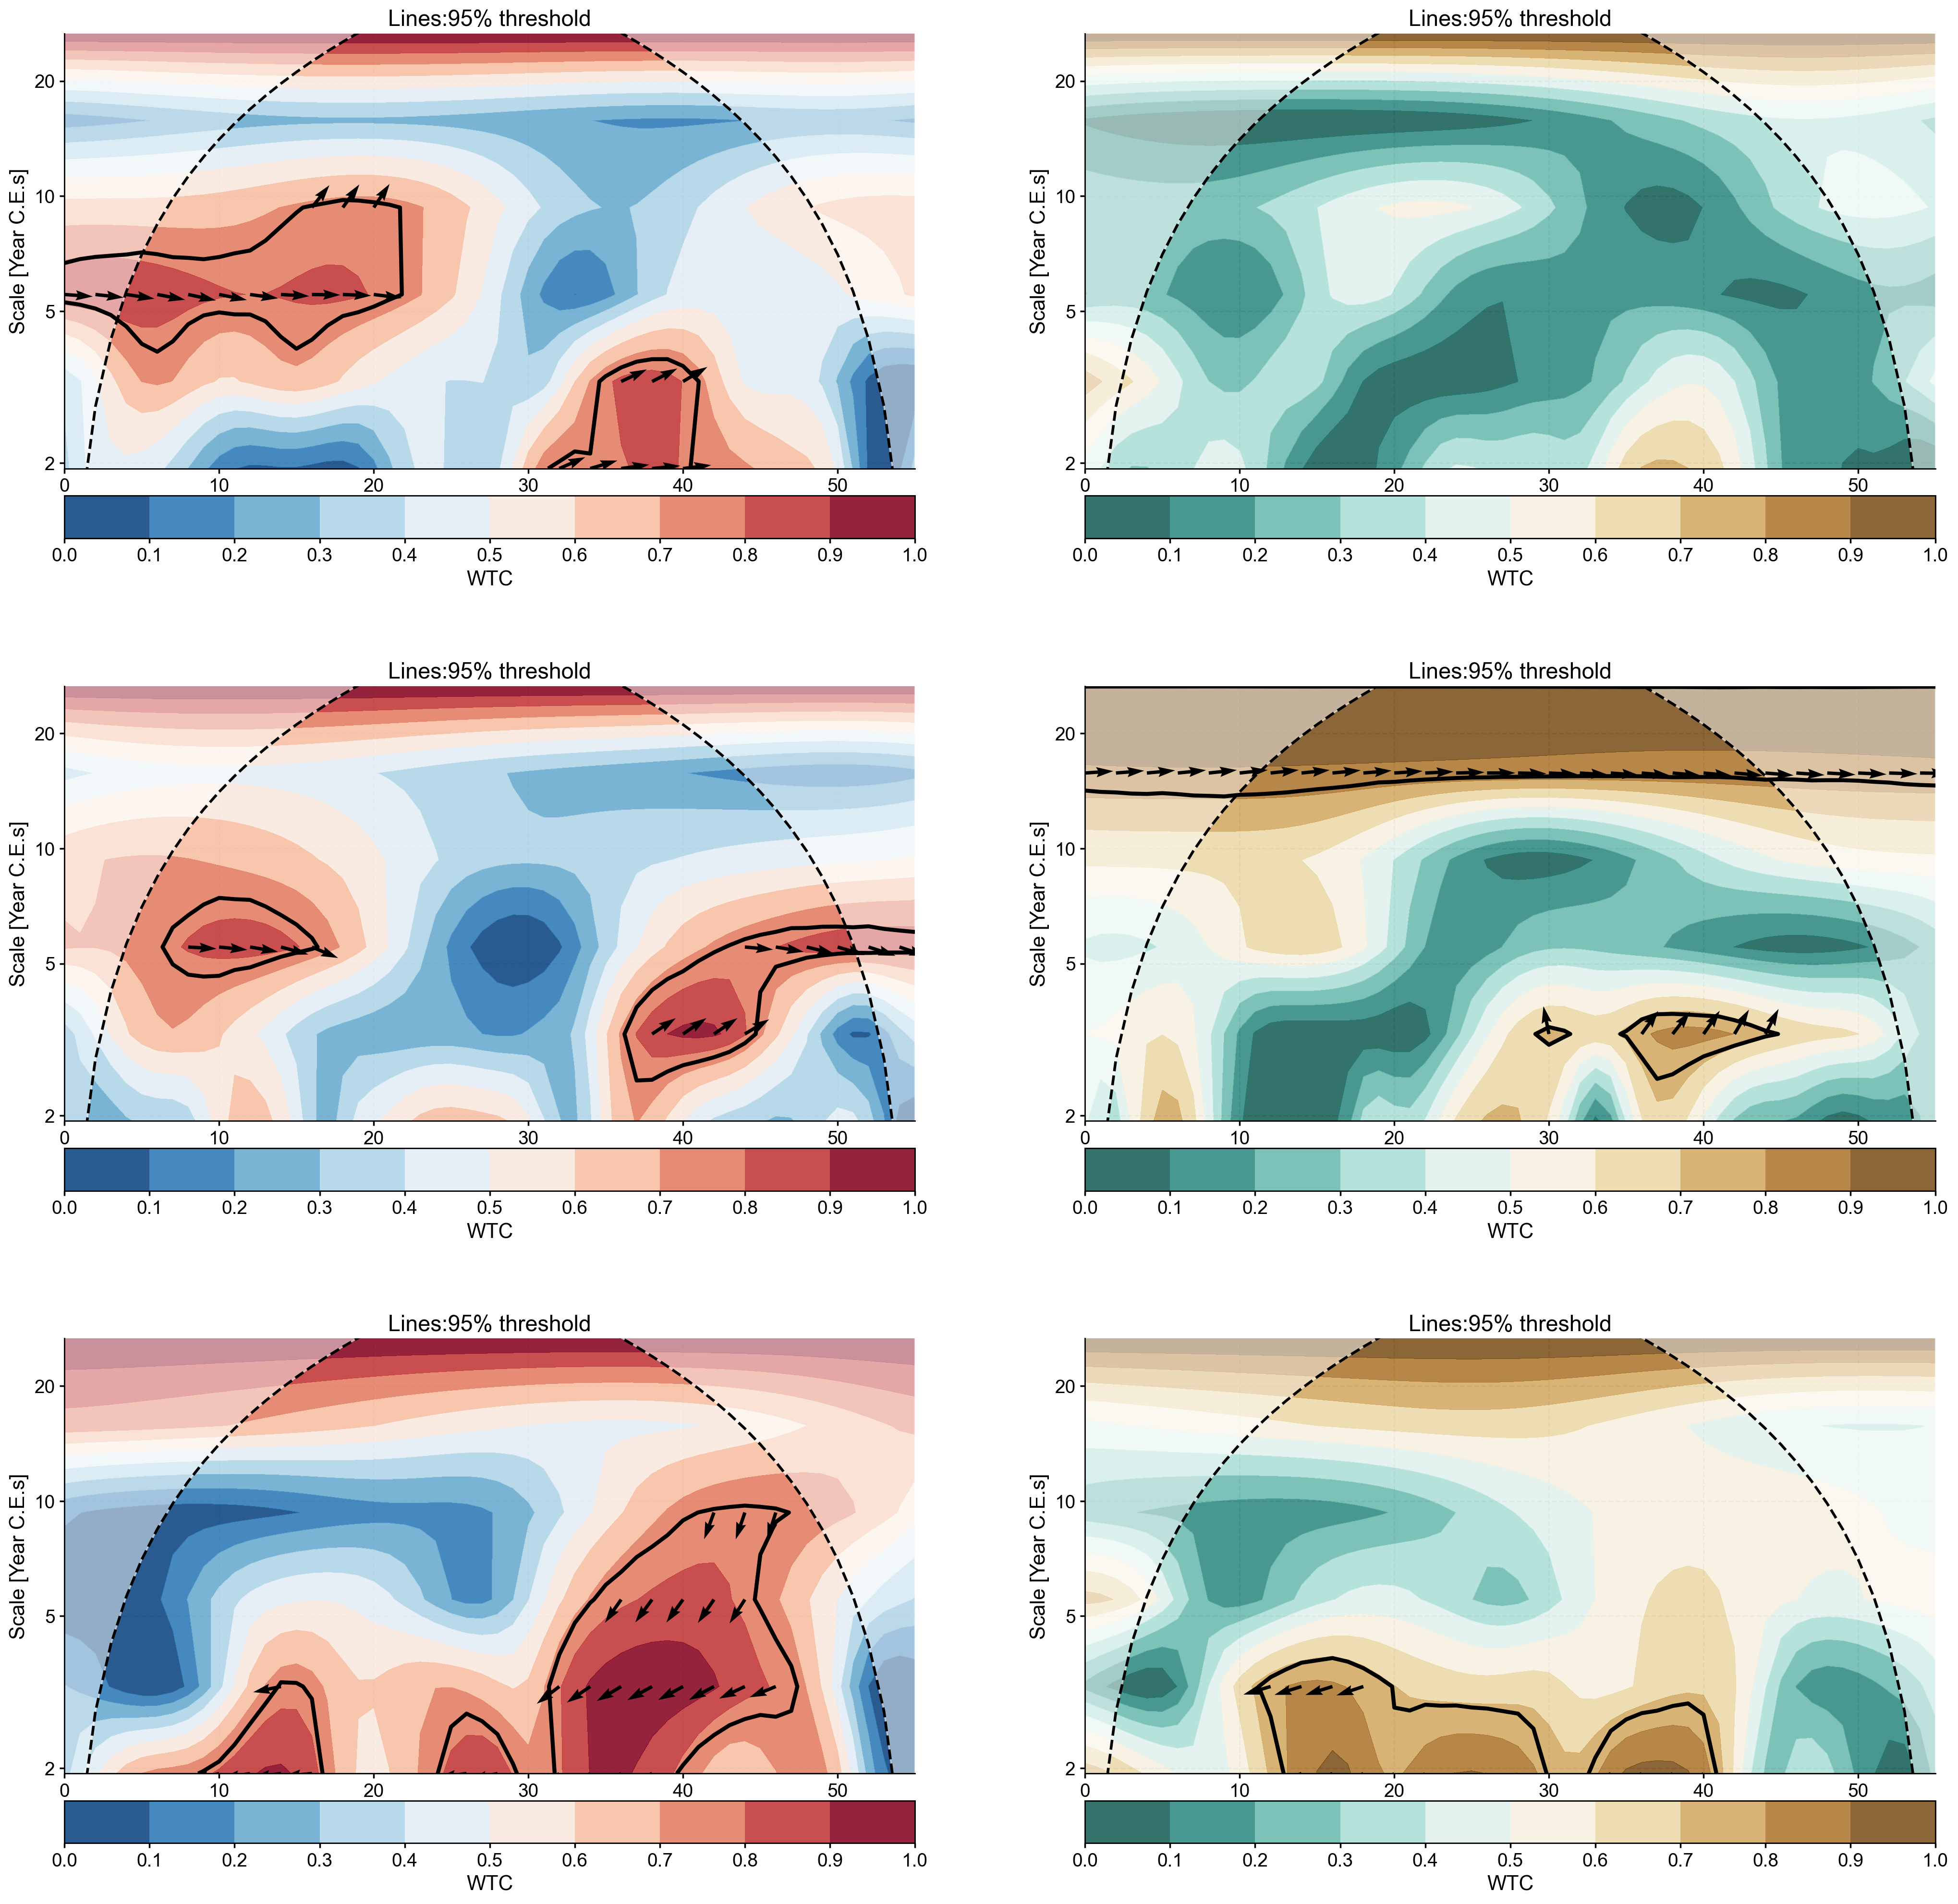

In [10]:
# OND IWC and OND PWC; figure we use for final paper
fig = plt.figure(figsize=(25,25))
gs = gridspec.GridSpec(nrows=3, ncols=3, height_ratios=[1,1,1], width_ratios=[1,1,0], figure=fig)
gs.update(left=0.1, right=0.95, wspace = 0.3, hspace=0.2)

ax1 = fig.add_subplot(gs[0,0])
coh_sigHUo.plot(ax = ax1, var = 'wtc', contourf_style = {'cmap':'RdBu_r', 'alpha' :0.9}, signif_clr = 'black', signif_linewidths = 3,
               cbar_style = {'location':'bottom', 'orientation':'horizontal'})

ax2 = fig.add_subplot(gs[0,1])
coh_sigHPWCo.plot(ax = ax2, var = 'wtc', contourf_style = {'cmap':'BrBG_r', 'alpha' :0.8}, signif_clr = 'black', signif_linewidths = 3,
               cbar_style = {'location':'bottom', 'orientation':'horizontal'})

ax3 = fig.add_subplot(gs[1,0])
coh_sigKUo.plot(ax = ax3, var = 'wtc', contourf_style = {'cmap':'RdBu_r', 'alpha' :0.9}, signif_clr = 'black', signif_linewidths = 3,
               cbar_style = {'location':'bottom', 'orientation':'horizontal'})

ax4 = fig.add_subplot(gs[1,1])
coh_sigKPWCo.plot(ax = ax4, var = 'wtc', contourf_style = {'cmap':'BrBG_r', 'alpha' :0.8}, signif_clr = 'black', signif_linewidths = 3,
               cbar_style = {'location':'bottom', 'orientation':'horizontal'})

ax5 = fig.add_subplot(gs[2,0])
coh_sigIUo.plot(ax = ax5, var = 'wtc', contourf_style = {'cmap':'RdBu_r', 'alpha' :0.9}, signif_clr = 'black', signif_linewidths = 3,
               cbar_style = {'location':'bottom', 'orientation':'horizontal'})

ax6 = fig.add_subplot(gs[2,1])
coh_sigIPWCo.plot(ax = ax6, var = 'wtc', contourf_style = {'cmap':'BrBG_r', 'alpha' :0.8}, signif_clr = 'black', signif_linewidths = 3,
               cbar_style = {'location':'bottom', 'orientation':'horizontal'})

fig.tight_layout()

# Figure S4

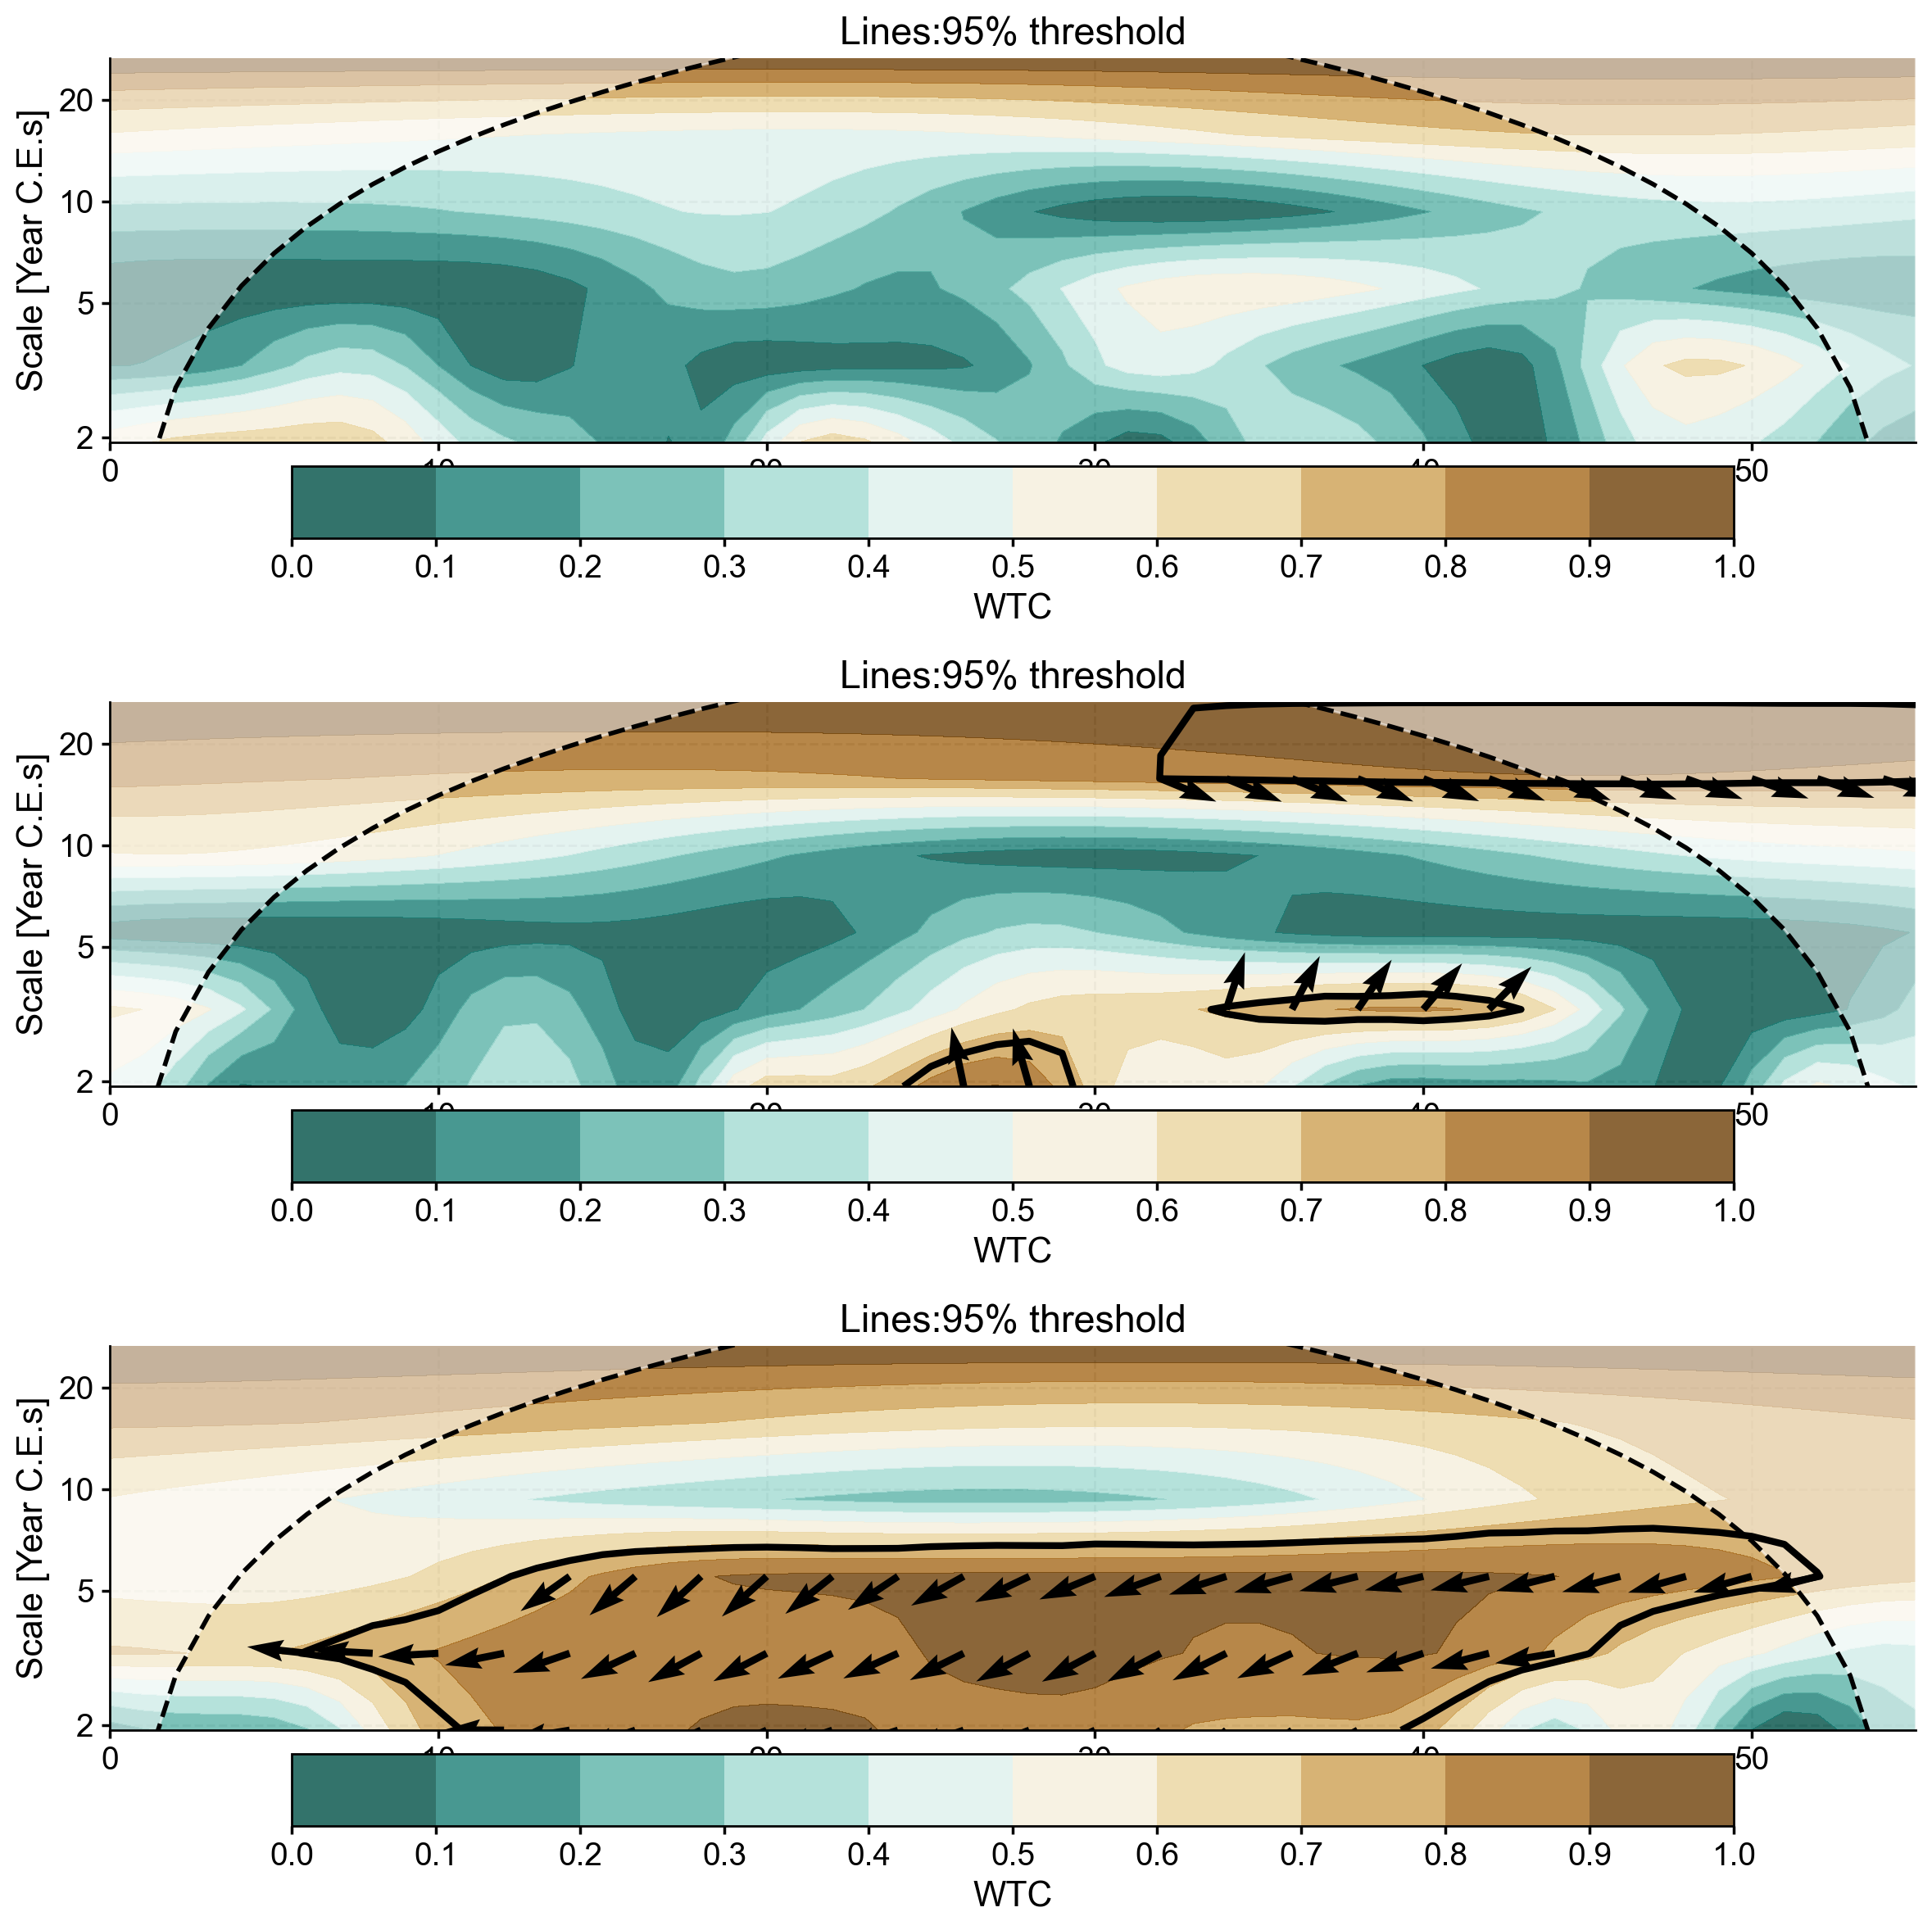

In [40]:
fig = plt.figure(figsize=(12,12))
gs = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[1,1,1], width_ratios=[1], figure=fig)

ax1 = fig.add_subplot(gs[0])
coh_sigHPWCa.plot(ax = ax1, var = 'wtc', contourf_style = {'cmap':'BrBG_r', 'alpha' :0.8}, signif_clr = 'black', signif_linewidths = 3,
               cbar_style = {'location':'bottom', 'orientation':'horizontal'})

ax2 = fig.add_subplot(gs[1])
coh_sigKPWCa.plot(ax = ax2, var = 'wtc', contourf_style = {'cmap':'BrBG_r', 'alpha' :0.8}, signif_clr = 'black', signif_linewidths = 3,
               cbar_style = {'location':'bottom', 'orientation':'horizontal'})

ax3 = fig.add_subplot(gs[2])
coh_sigIPWCa.plot(ax = ax3, var = 'wtc', contourf_style = {'cmap':'BrBG_r', 'alpha' :0.8}, signif_clr = 'black', signif_linewidths = 3,
               cbar_style = {'location':'bottom', 'orientation':'horizontal'})

fig.tight_layout()